In [1]:
!dir

 Volume in drive C is OS
 Volume Serial Number is AA23-606F

 Directory of C:\Users\Paul\PycharmProjects\BlogPost

05/22/2019  05:50 PM    <DIR>          .
05/22/2019  05:50 PM    <DIR>          ..
05/20/2019  07:40 PM             1,454 .gitignore
05/22/2019  05:47 PM    <DIR>          .idea
05/21/2019  05:04 PM    <DIR>          .ipynb_checkpoints
05/22/2019  05:50 PM            93,626 BlogPost.ipynb
05/20/2019  07:43 PM    <DIR>          data
05/22/2019  05:29 PM             7,875 main.py
05/20/2019  07:01 PM             4,930 readme.md
05/21/2019  04:11 PM    <DIR>          __pycache__
               4 File(s)        107,885 bytes
               6 Dir(s)  84,587,884,544 bytes free


In [2]:
%matplotlib inline

In [3]:
%run -i main.py

         Year    Age   Race   Income  Over Median Income  Adults  Children  \
51336  2015.0  25-29  White     $75+                True     2.0       0.0   
51337  2015.0  18-24  Black  $25-35K               False     1.0       3.0   
51338  2015.0  18-24  Black  $25-35K               False     1.0       1.0   
51339  2015.0  18-24  White  $35-50K               False     2.0       0.0   
51340  2015.0  45-49  White     $75+                True     3.0       1.0   

       Household Size  Zip-code  In Food Desert  Unemployed  Active  \
51336             2.0   98908.0           False       False   False   
51337             4.0   98208.0           False       False   False   
51338             2.0   98433.0           False       False   False   
51339             2.0   98122.0           False       False   False   
51340             4.0   98686.0           False       False   False   

      Overweight Pre-Diabetic Diabetic  Good-health  No Veg  No Fruit  \
51336      False        False  

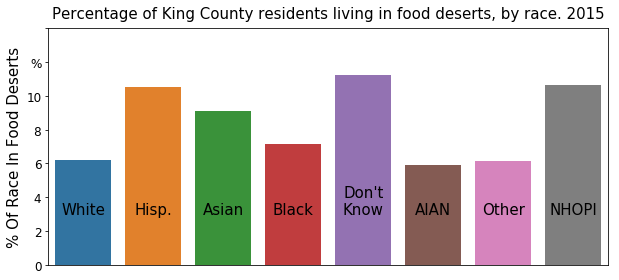

In [94]:
by_race = df15.melt(id_vars='Race',
                   value_vars='In Food Desert',
                   value_name='in food desert')
fig = plt.figure(figsize=(9, 4))
ax = fig.gca()
sns.barplot('Race',
           'in food desert',
           data=by_race,
           ci=.99,
           ax=ax)
races = by_race['Race'].value_counts().index
for x, race in enumerate(races):
    plt.text(x=x, y=.03, s=race, ha='center', fontsize=15)
plt.title('Percentage of King County residents living in food deserts, by race. 2015', fontsize=15, pad=10)
ax.set_xticks([])
ax.set_xlabel('')
ax.set_ylim(0, .14)
ax.set_yticklabels(['0','2', '4', '6', '8', '10', '%'], fontsize=12)
ax.set_ylabel('% Of Race In Food Deserts', fontsize=15)
plt.tight_layout()

In [103]:
hmm = by_race[(by_race['in food desert']== 1)]
hmm.head()

,Race,variable,in food desert
23,White,In Food Desert,True
34,White,In Food Desert,True
39,White,In Food Desert,True
46,Asian,In Food Desert,True
51,White,In Food Desert,True


In [104]:
hmm['Race'].value_counts()

White          591
Hisp.           46
Asian           45
Black           23
AIAN            11
Don't\nKnow     10
Other            8
NHOPI            3
Name: Race, dtype: int64

In [96]:
sum(by_race['in food desert'] == 1)

752

In [95]:
sum((by_race['Race'] == 'Hisp.'))

643

In [101]:
sum((by_race['Race'] == 'White') & (by_race['in food desert'] == 1))

591

In [91]:
by_income = df15.melt(id_vars='Over Median Income',
                      value_vars='In Food Desert',
                      value_name='in food desert')
by_income.head()

,Over Median Income,variable,in food desert
0,True,In Food Desert,False
1,False,In Food Desert,False
2,False,In Food Desert,False
3,False,In Food Desert,False
4,True,In Food Desert,False


''

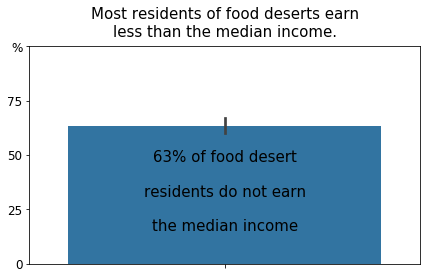

In [92]:
in_desert = df15[df15['In Food Desert']]
nums_in_desert = in_desert['Over Median Income'].value_counts().values
prop_not_over = nums_in_desert[0] /sum(nums_in_desert)
fig = plt.figure(figsize=(7, 4))
ax = fig.gca()
sns.barplot(~in_desert['Over Median Income'], orient='v')
ax.set_ylim(0, 1)
ax.set_yticks([0, .25, .5, .75, 1])
ax.set_yticklabels(['0', '25', '50', '75', '%'], fontsize=12)
ax.set_ylabel('')
# ax.set_xlabel('Proportion Under Median Income', fontsize=13)
ax.set_title('Most residents of food deserts earn\nless than the median income.', fontsize=15, pad=10)
ax.text(0, .15, s=f'{prop_not_over * 100:.0f}% of food desert\n\nresidents do not earn\n\nthe median income',
       ha='center', fontsize=15)
;

In [34]:
fruits_n_veg = ['Fruit Daily', 'Veg Daily', 'Fruit Weekly',
                'Veg Weekly', 'Fruit Monthly', 'Veg Monthly']

df15_consumption = df15.melt(id_vars='In Food Desert',
                             value_vars=fruits_n_veg,
                             value_name='Proportion reporting eating...')

df13_consumption = df13.melt(id_vars='In Food Desert',
                             value_vars=fruits_n_veg,
                             value_name='Proportion reporting eating...')

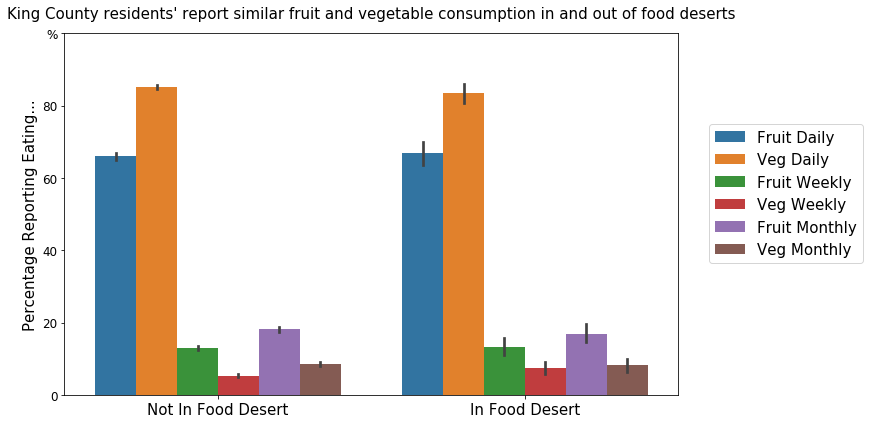

In [10]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
sns.barplot('In Food Desert',
            'Proportion reporting eating...',
            hue='variable',
            data=df15_consumption,
            ax=ax)
plt.legend(bbox_to_anchor=(1.05, .75),
           loc=2,
           borderaxespad=0.,
           fontsize=15)
plt.title('King County residents\' report similar fruit and vegetable consumption in and out of food deserts.', fontsize=15, pad=15)
ax.set_xticklabels(['Not In Food Desert', 'In Food Desert'], fontsize=15)
ax.set_xlabel('')
ax.set_ylabel('Percentage Reporting Eating...', fontsize=15)
ax.set_ylim(0, 1)
ax.set_yticklabels(['0', '20', '40', '60', '80', '%'], fontsize=12)
plt.tight_layout()
plt.show()

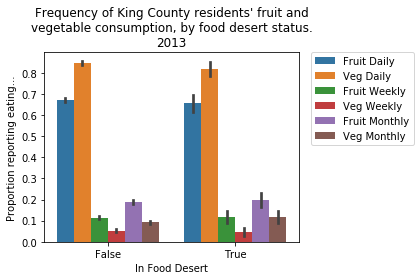

In [38]:
sns.barplot('In Food Desert',
            'Proportion reporting eating...',
            hue='variable',
            data=df13_consumption)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0.)
plt.title('Frequency of King County residents\' fruit and\nvegetable consumption, by food desert status.\n2013')
plt.tight_layout()
plt.show()


In [40]:
df15.columns

Index(['Year', 'Age', 'Race', 'Income', 'Over Median Income', 'Adults',
       'Children', 'Household Size', 'Zip-code', 'In Food Desert',
       'Unemployed', 'Active', 'Overweight', 'Pre-Diabetic', 'Diabetic',
       'Good-health', 'No Veg', 'No Fruit', 'Fruit Daily', 'Veg Daily',
       'Fruit Weekly', 'Veg Weekly', 'Fruit Monthly', 'Veg Monthly'],
      dtype='object')

In [63]:
df_oasis = df15[df15['In Food Desert'] == 0]
df_desert = df15[df['In Food Desert'] == 1]
df_desert.head()

main.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import numpy as np


,Year,Age,Race,Income,Over Median Income,Adults,Children,Household Size,Zip-code,In Food Desert,Unemployed,Active,Overweight,Pre-Diabetic,Diabetic,Good-health,No Veg,No Fruit,Fruit Daily,Veg Daily,Fruit Weekly,Veg Weekly,Fruit Monthly,Veg Monthly
51367,2015.0,35-39,White,$75+,True,3.0,1.0,4.0,98198.0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False
51382,2015.0,25-29,White,$75+,True,2.0,0.0,2.0,98057.0,True,False,False,NaN,False,False,True,False,False,True,True,False,False,False,False
51389,2015.0,30-34,White,$35-50K,False,1.0,0.0,1.0,98103.0,True,False,False,False,False,False,True,False,False,False,True,True,False,False,False
51399,2015.0,40-44,Asian,$75+,True,2.0,1.0,3.0,98103.0,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False
51404,2015.0,18-24,White,$35-50K,False,2.0,0.0,2.0,98103.0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False


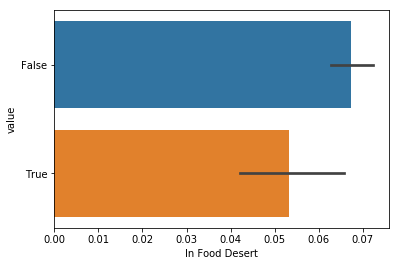

In [62]:
sns.barplot('In Food Desert', 'value', data=diabetics, orient='h')